Transition count matrices
=====================

A transition count matrix is a matrix that contains all the vocabulary (rows) and all of the positions (columns) and each of the elements is simply a count of the number of times that a transition occurs.  This matrix is can be created from an alignment matrix or it may be found by counting all of the transitions in a given phylogenetic tree.

Simple convert example
---------------------------

We assume that trees are provided in the [newick-tree](http://evolution.genetics.washington.edu/phylip/newicktree.html) format. Conveniently, in Python there is a package for [handling newick trees](https://pythonhosted.org/ete2/tutorial/tutorial_trees.html#reading-newick-trees).

 * [ete2](http://pythonhosted.org/ete2/)
 
 
First, lets get familiar with ete2.


In [20]:
from ete2 import Tree,TreeStyle


nwTree = "(Rhodospirillum_rubrum_3.8_ACC:1.21718:ACC:0.795739:ATC:0.423212:GTC,Gluconobacter_oxydans_621H_0.94_ACC:2.74115:ACC:0.799534:AAC:0.627617:ACC:0.146405:ATC:1.33201:GTC,((Zymomonas_mobilis_\
2_ATT:1.09065:ATT:0.849922:GTT:2.71093:GTC:0.449868:CTC:0.131212:GTC,Sphingopyxis_alaskensis_2.39_ATC:0.74794:ATC:0.594103:GTC)_GTC:1.0974:GTC:0.38102:TTC:0.913789:GTC:0.0701186:GCC,((Rhodobacter_sphaero\
ides_3_ACC:1.08263:ACC,Paracoccus_denitrificans_2.1_ACC:1.30088:ACC)_ACC:1.38045:ACC:0.18737:GCC,(Caulobacter_crescentus_1.5_TAT:0.238576:TAT:1.60043:TTT:0.695896:TTC:0.327243:TCC:0.0261362:GCC,((Nitroba\
cter_winogradskyi_8_GTC:1.1677:GTC,(Rhodopseudomonas_palustris_9_ATC:0.510936:ATC:0.392843:GTC,Bradyrhizobium_japonicum_USDA110_20_GTC:0.691677:GTC)_GTC:0.0708203:GTC)_GTC:1.28532:GTC,((Mesorhizobium_lot\
i_2.4_GTC:1.38965:GTC,(Brucella_suis_1330_2_ATC:0.427971:ATC,(Bartonella_quintana_Toulouse_3_ATT:0.486504:ATT,Bartonella_henselae_Houston-1_3_ATT:0.363287:ATT)_ATT:0.68998:ATT:0.184105:ACT:0.0937438:ACG:\
0.672405:ACC:0.682118:ACT:0.630906:ACC:0.647151:ACT:0.8754:ATT:0.498107:ATC)_ATC:0.766973:ATC:0.629549:GTC)_GTC:0.292427:GTC,(Sinorhizobium_meliloti_1021_1.5_GTC:0.998178:GTC,Agrobacterium_tumefaciens_C5\
8_3_GTC:1.33291:GTC)_GTC:0.73082:GTC)_GTC:1.26457:GTC)_GTC:0.506179:GTC:0.365595:GCC)_GCC:0.0466269:GCC)_GCC:0.0418115:GCC)_GCC:0.443192:GCC:0.196449:GTC)_GTC;"

## load tree
t = Tree(nwTree)

## draw simple layout
ts1 = TreeStyle()
ts1.show_leaf_name = True
ts1.show_branch_length = True
ts1.show_branch_support = True
out = t.render("./figures/simple-tree-simple.png", units="mm", tree_style=ts1)

## draw curcular layout 
ts2 = TreeStyle()
ts2.mode = "c" 
ts2.scale = 20
out = t.render("./figures/simple-tree-circular.png", w=183, units="mm", tree_style=ts2)
print 'done'

done


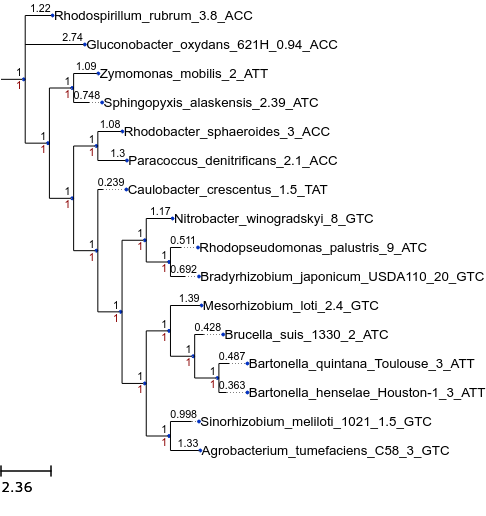

In [13]:
from IPython.display import Image
Image(filename='./figures/simple-tree-simple.png')

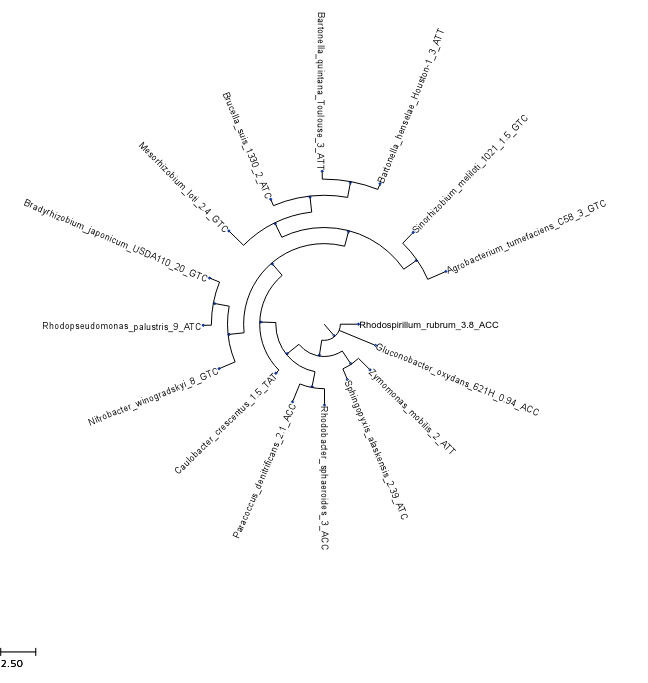

In [14]:
Image(filename='./figures/simple-tree-circular.png')

A note on unrooted trees
------------------------------

[From the documentation](https://pythonhosted.org/ete2/tutorial/tutorial_trees.html#reading-newick-trees)...

> When a tree is loaded from external sources, a pointer to the top-most node is returned. This is called the tree root, and it will exist even if the tree is conceptually considered as unrooted. This is, the root node can be considered as the master node, since it represents the whole tree structure. Unrooted trees can be identified as trees in which master root node has more than two children

Phylogenetic Trees
--------------------------

We want to link the alignment with the tree.  This is the example from the docs.

In [18]:
from ete2 import PhyloTree, TreeStyle

alg = """
 >Dme_001
 MAEIPDETIQQFMALT---HNIAVQYLSEFGDLNEAL--YYASQTDDIKDRREEAH
 >Dme_002
 MAEIPDATIQQFMALTNVSHNIAVQY--EFGDLNEALNSYYAYQTDDQKDRREEAH
 >Cfa_001
 MAEIPDATIQ---ALTNVSHNIAVQYLSEFGDLNEALNSYYASQTDDQPDRREEAH
 >Mms_001
 MAEAPDETIQQFMALTNVSHNIAVQYLSEFGDLNEAL--------------REEAH
 >Hsa_001
 MAEIPDETIQQFMALT---HNIAVQYLSEFGDLNEALNSYYASQTDDIKDRREEAH
 >Ptr_002
 MAEIPDATIQ-FMALTNVSHNIAVQY--EFGDLNEALNSY--YQTDDQKDRREEAH
 >Mmu_002
 MAEIPDATIQ---ALTNVSHNIAVQYLSEFGDLNEALNSYYASQTDDQPDRREEAH
 >Hsa_002
 MAEAPDETIQQFM-LTNVSHNIAVQYLSEFGDLNEAL--------------REEAH
 >Mmu_001
 MAEIPDETIQQFMALT---HNIAVQYLSEFGDLNEALNSYYASQTDDIKDRREEAH
 >Ptr_001
 MAEIPDATIQ-FMALTNVSHNIAVQY--EFGDLNEALNSY--YQTDDQKDRREEAH
 >Mmu_003
 MAEIPDATIQ---ALTNVSHNIAVQYLSEFGDLNEALNSYYASQTDDQPDRREEAH
"""

def get_example_tree():

    # Performs a tree reconciliation analysis 
    gene_tree_nw = '((Dme_001,Dme_002),(((Cfa_001,Mms_001),((Hsa_001,Ptr_001),Mmu_001)),(Ptr_002,(Hsa_002,Mmu_002))));'
    species_tree_nw = "((((Hsa, Ptr), Mmu), (Mms, Cfa)), Dme);"
    genetree = PhyloTree(gene_tree_nw)
    sptree = PhyloTree(species_tree_nw)
    recon_tree, events = genetree.reconcile(sptree)
    recon_tree.link_to_alignment(alg)
    return recon_tree, TreeStyle()

# Visualize the reconciled tree
t, ts = get_example_tree()
out = t.render("./figures/phylotree-example.png", w=750)

Warnning: [5] terminal nodes could not be found in the alignment.


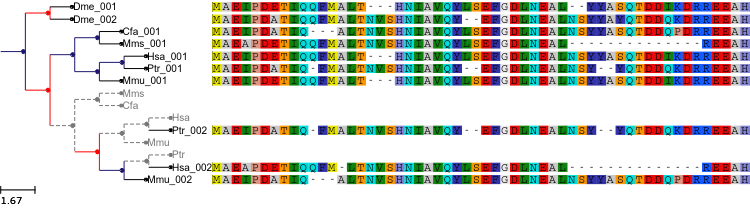

In [19]:
Image(filename='./figures/phylotree-example.png')